# Historical-Future scenarios

In [1]:
%cd ..

/home/rocky/project/mce


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import pyam
from mce.core import ScenarioBase
from mce.util.plot_base import PlotBase

## Selected future scenarios

In [3]:
# Five SSP scenarios in WGI AR6
ar6wg1_ssp = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# Illustrative pathways in WGIII AR6
ar6wg3_imp = [
    # Five illustrative mitigation pathways
    'SP', # mitigation in the context of broader sustainable development
    'LD', # strong emphasis on energy demand reductions
    'Ren', # heavy reliance on renewables
    'Neg', # extensive use of carbon dioxide removal (CDR) in the energy and the industry sectors to achieve net negative emissions;
    'GS', # the implications of a less rapid and gradual strengthening of near-term mitigation actions
    #  Ren and Neg have 2-degC sensitivity case
    'Ren-2.0',
    'Neg-2.0',
    # Two reference pathways as the consequences of current policies and pledges
    'ModAct', # Moderate action, explores the impact of implementing the Nationally Determined Contributions (NDCs) as formulated in 2020 and some further strengthening after that;
    'CurPol', # explores the consequences of continuing along the path of implemented climate policies in 2020 and only a gradual strengthening after that
]

In [4]:
# Mapper for scenario names
map_scenario = {
    scen: 'SSP{}-{}.{}'.format(*list(scen[3:]))
    for scen in ar6wg1_ssp
}
map_scenario.update({
    scen: '{}-{}'.format('IP' if scen in ['ModAct', 'CurPol'] else 'IMP', scen)
    for scen in ar6wg3_imp if not scen.endswith('2.0')
})
for scen in ['Ren', 'Neg']:
    map_scenario[f'{scen}-2.0'] = map_scenario[scen]

map_scenario

{'ssp119': 'SSP1-1.9',
 'ssp126': 'SSP1-2.6',
 'ssp245': 'SSP2-4.5',
 'ssp370': 'SSP3-7.0',
 'ssp585': 'SSP5-8.5',
 'SP': 'IMP-SP',
 'LD': 'IMP-LD',
 'Ren': 'IMP-Ren',
 'Neg': 'IMP-Neg',
 'GS': 'IMP-GS',
 'ModAct': 'IP-ModAct',
 'CurPol': 'IP-CurPol',
 'Ren-2.0': 'IMP-Ren',
 'Neg-2.0': 'IMP-Neg'}

In [5]:
# Mapper for scenario colors
map_color = {k: pyam.plotting.PYAM_COLORS[f'AR6-{scen}'] for k, scen in map_scenario.items()}
map_color['historical'] = 'k'
map_color

{'ssp119': '#00a9cf',
 'ssp126': '#003466',
 'ssp245': '#f69320',
 'ssp370': '#df0000',
 'ssp585': '#980002',
 'SP': '#004D52',
 'LD': '#4FA7BF',
 'Ren': '#2B7C8B',
 'Neg': '#84A12B',
 'GS': '#6E7895',
 'ModAct': '#F29424',
 'CurPol': '#E31F2B',
 'Ren-2.0': '#2B7C8B',
 'Neg-2.0': '#84A12B',
 'historical': 'k'}

In [6]:
myplt = PlotBase(palette='ipcc_wg1')

## Input data

In [7]:
ds_hist = ScenarioBase(outpath='datain/ds_historical.h5', mode='r')
ds_rcmip2 = ScenarioBase(outpath='datain/ds_rcmip2.h5', mode='r')
ds_ar6db_imp = ScenarioBase(outpath='datain/ds_ar6db_imp.h5', mode='r')

[2025-04-24 18:18:03 mce.core] INFO:datain/ds_historical.h5 already exists
[2025-04-24 18:18:03 mce.core] INFO:file datain/ds_historical.h5 opened with mode=r
[2025-04-24 18:18:03 mce.core] INFO:datain/ds_rcmip2.h5 already exists
[2025-04-24 18:18:03 mce.core] INFO:file datain/ds_rcmip2.h5 opened with mode=r
[2025-04-24 18:18:03 mce.core] INFO:datain/ds_ar6db_imp.h5 already exists
[2025-04-24 18:18:03 mce.core] INFO:file datain/ds_ar6db_imp.h5 opened with mode=r


In [8]:
list(ds_hist.file)

['historical', 'source']

In [9]:
list(ds_rcmip2.file)

['1pctCO2',
 '1pctCO2-4xext',
 'abrupt-0p5xCO2',
 'abrupt-2xCO2',
 'abrupt-4xCO2',
 'esm-bell-1000PgC',
 'esm-bell-2000PgC',
 'esm-bell-750PgC',
 'esm-pi-CO2pulse',
 'esm-pi-cdr-pulse',
 'esm-piControl',
 'historical',
 'historical-cmip5',
 'piControl',
 'rcp26',
 'rcp45',
 'rcp60',
 'rcp85',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF-aerchemmip',
 'ssp370-lowNTCF-gidden',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585']

In [10]:
list(ds_ar6db_imp.file)

['CurPol',
 'GS',
 'LD',
 'ModAct',
 'Neg',
 'Neg-2.0',
 'Ren',
 'Ren-2.0',
 'SP',
 'source']

## Plot selected variables

In [11]:
def retrieve_data_wrap(dsset, scenarios, cat, vn):
    data = {}

    for ds in dsset:
        for scen in ds.file:
            if scen in data or scen not in scenarios:
                continue

            g = ds.file['{}/input/{}'.format(scen, cat)]
            data[scen] = pd.Series(g[vn], index=g['time']).rename((vn, g[vn].attrs['units']))

    return data

In [12]:
scenarios = [
    'historical',
    'ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585',
    'SP', 'LD', 'Ren', 'Neg', 'GS',
    # 'Ren-2.0', 'Neg-2.0',
    'ModAct', 'CurPol',
]

dsset = [ds_hist, ds_rcmip2, ds_ar6db_imp]
data = {
    (cat, vn): retrieve_data_wrap(dsset, scenarios, cat, vn)
    for cat, vn in [
        ('emis_co2', 'FFI'),
        ('emis_co2', 'AFOLU'),
        ('emis_ghg', 'CH4'),
        ('emis_ghg', 'N2O'),
        ('emis_slcf', 'BC'),
        ('emis_slcf', 'SO2'),
    ]
}

In [13]:
map_slc = {'historical': slice(1950, None)}
slc = slice(2015, 2100)

handles = [
    mpl.lines.Line2D(
        [], [], color=map_color[scen],
        lw=1.8 if scen in ar6wg3_imp else 0.6,
    )
    for scen in scenarios
]
labels = [map_scenario.get(scen, scen) for scen in scenarios]

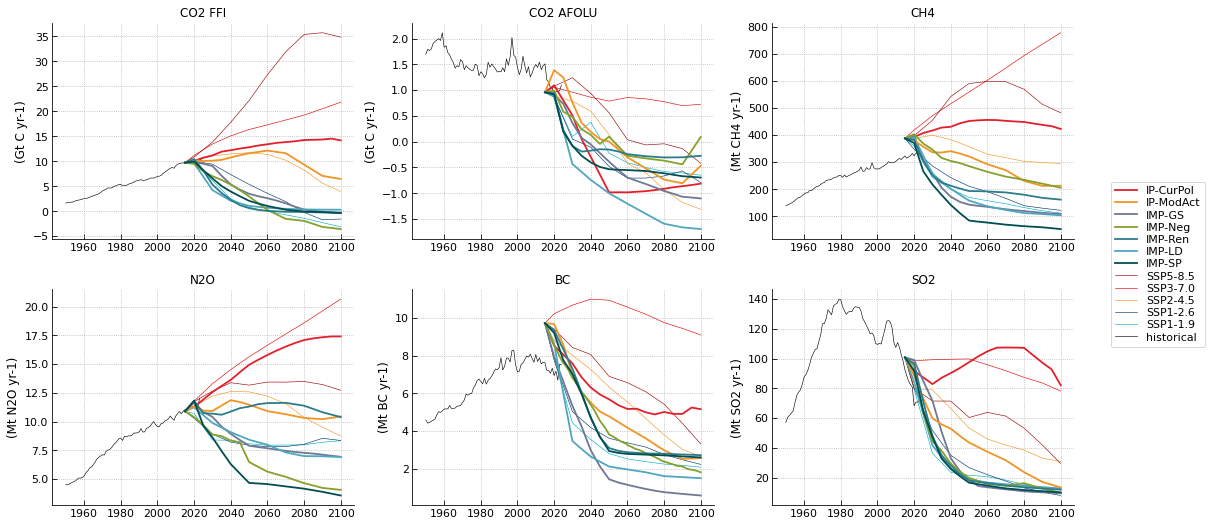

In [14]:
myplt.init_regular(len(data), col=3)

for ax, ((cat, vn), dset) in zip(myplt(), data.items()):
    for scen, d1 in dset.items():
        d1 = d1.loc[map_slc.get(scen, slc)]
        lw = 1.8 if scen in ar6wg3_imp else 0.6
        ax.plot(d1.index, d1, color=map_color[scen], lw=lw)

    title = f'CO2 {vn}' if vn in ['FFI', 'AFOLU'] else vn
    ax.set_title(title)
    ax.set_ylabel('({})'.format(d1.name[1]))
    ax.grid()

_ = myplt.figure.legend(
    handles[::-1], labels[::-1],
    labelspacing=0.2,
    loc='center left',
    bbox_to_anchor=myplt.get_fig_position_relto_axes((1.03, 0.5)),
)

Big differences in CH4 between historical and future are due to historical data updates (Forster et al., 2024, https://doi.org/10.5194/essd-16-2625-2024)

## Examples of historical-future emissions

In [15]:
def retrieve_data(ds, scen):
    return {
        cat: pd.DataFrame({
            (k, v.attrs['units']): v for k, v in g.items()
        }).set_index(('time', 'yr'))
        for cat, g in ds.file[f'{scen}/input'].items()
    }

In [16]:
def merge(df_hist, df_future, t_start, t_end):
    """Merge historical and future scenarios

    Parameters
    ----------
    df_hist
        Historical scenario
    df_future
        Future scenario
    t_start
        Year of transition start
    t_end
        Year of transition end

    Returns
    -------
        Merged future scenario
    """
    df = pd.concat({'hist': df_hist, 'future': df_future}, axis=1)

    if np.any(np.isnan(df['hist'].loc[t_start:t_end-1])):
        raise ValueError('hist not all defined in {}-{}'.format(t_start, t_end-1))
    
    if np.any(np.isnan(df['future'].loc[t_start+1:t_end])):
        raise ValueError('future not all defined in {}-{}'.format(t_start+1, t_end))
    
    wgt_future = np.linspace(0., 1., t_end - t_start + 1)
    wgt_hist = 1. - wgt_future
    
    df = (
        df['hist'].loc[t_start:t_end].fillna(0.) * wgt_hist[:, None]
        + df['future'].loc[t_start:t_end].fillna(0.) * wgt_future[:, None]
    ).dropna(axis=1) # keep variables both in hist and future

    return pd.concat([df, df_future.loc[t_end+1:, df.columns]])

### SSP2-4.5

In [17]:
data_hist = retrieve_data(ds_hist, 'historical')

t_start, t_end = 2015, 2024
time_future = np.arange(t_start, 2100+1)

scen = 'ssp245'
data_future = {
    cat: df.reindex(time_future).interpolate()
    for cat, df in retrieve_data(ds_rcmip2, scen).items()
}

data_merged = {
    cat: merge(data_hist[cat], data_future[cat], t_start, t_end)
    for cat in ['emis_co2', 'emis_ghg', 'emis_slcf']
}

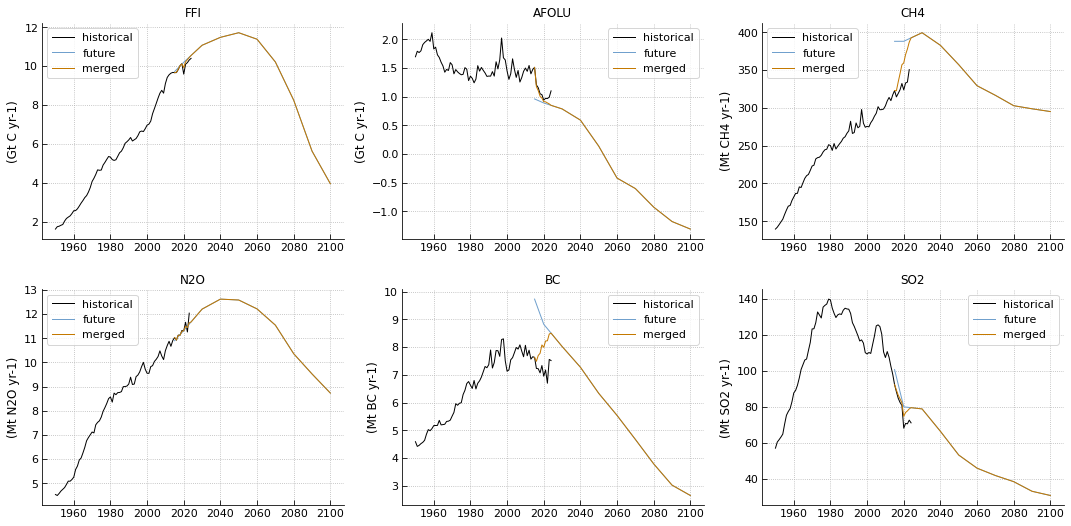

In [18]:
cat_vars =  [
    ('emis_co2', 'FFI'),
    ('emis_co2', 'AFOLU'),
    ('emis_ghg', 'CH4'),
    ('emis_ghg', 'N2O'),
    ('emis_slcf', 'BC'),
    ('emis_slcf', 'SO2'),
]

myplt.init_regular(len(cat_vars), col=3)

for ax, (cat, vn) in zip(myplt(), cat_vars):
    units = dict(data_merged[cat].columns.tolist())[vn]

    d1 = data_hist[cat][(vn, units)].loc[1950:]
    ax.plot(d1.index, d1, label='historical')

    d1 = data_future[cat][(vn, units)].loc[t_start:2100]
    ax.plot(d1.index, d1, label='future')

    d1 = data_merged[cat][(vn, units)]
    ax.plot(d1.index, d1, label='merged')

    ax.legend()
    ax.set_title(vn)
    ax.set_ylabel('({})'.format(units))
    ax.grid()

### IMP-SP

In [19]:
scen = 'SP'
data_future = retrieve_data(ds_ar6db_imp, scen)

data_merged = {
    cat: merge(data_hist[cat], data_future[cat], t_start, t_end)
    for cat in ['emis_co2', 'emis_ghg', 'emis_slcf']
}

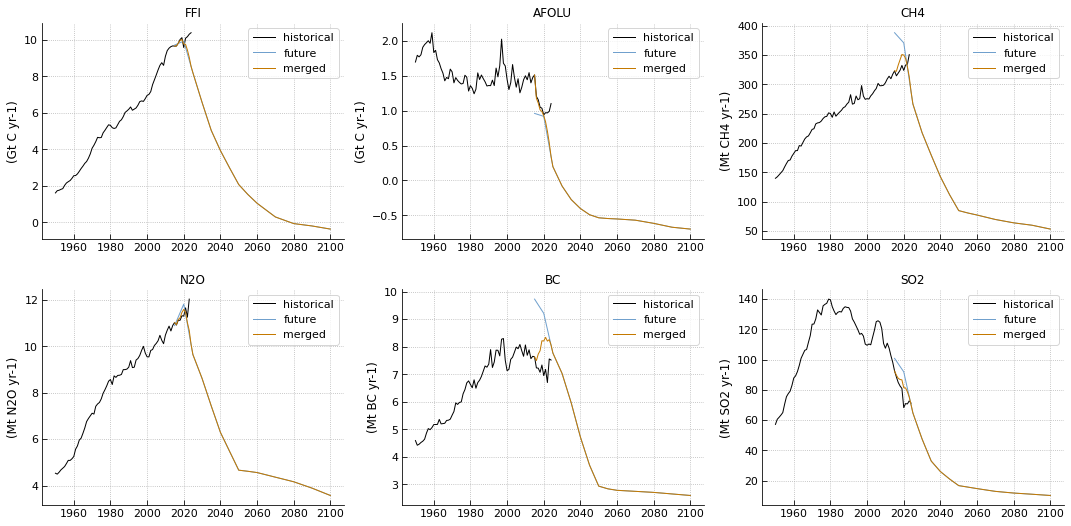

In [20]:
myplt.init_regular(len(cat_vars), col=3)

for ax, (cat, vn) in zip(myplt(), cat_vars):
    units = dict(data_merged[cat].columns.tolist())[vn]

    d1 = data_hist[cat][(vn, units)].loc[1950:]
    ax.plot(d1.index, d1, label='historical')

    d1 = data_future[cat][(vn, units)].loc[t_start:2100]
    ax.plot(d1.index, d1, label='future')

    d1 = data_merged[cat][(vn, units)]
    ax.plot(d1.index, d1, label='merged')

    ax.legend()
    ax.set_title(vn)
    ax.set_ylabel('({})'.format(units))
    ax.grid()

In [21]:
ds_hist.close()
ds_rcmip2.close()
ds_ar6db_imp.close()

[2025-04-24 18:18:08 mce.core] INFO:file datain/ds_historical.h5 closed
[2025-04-24 18:18:08 mce.core] INFO:file datain/ds_rcmip2.h5 closed
[2025-04-24 18:18:08 mce.core] INFO:file datain/ds_ar6db_imp.h5 closed
